In [1]:
import pandas as pd, xarray as xr, re

# Check processing of GMST time series

Original code taken from version on github repository - behaves as expected

In [5]:
! wget https://climexp.knmi.nl/data/igiss_al_gl_a_4yrlo.dat

--2026-01-05 10:25:28--  https://climexp.knmi.nl/data/igiss_al_gl_a_4yrlo.dat
Resolving climexp.knmi.nl (climexp.knmi.nl)... 2a0c:5bc0:4c:ff::9126:ce95, 145.38.206.149
Connecting to climexp.knmi.nl (climexp.knmi.nl)|2a0c:5bc0:4c:ff::9126:ce95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4763 (4.7K)
Saving to: ‘igiss_al_gl_a_4yrlo.dat’

igiss_al_gl_a_4yrlo 100%[===================>]   4.65K  --.-KB/s    in 0s      

2026-01-05 10:25:28 (50.8 MB/s) - ‘igiss_al_gl_a_4yrlo.dat’ saved [4763/4763]



In [6]:
gmst = pd.read_csv("igiss_al_gl_a_4yrlo.dat", comment = "#", sep = " +", engine = "python", header = None, names = ["year","gmst"], index_col = "year")

# create CSV with headers for upload to Climate Explorer

csv_fnm = "EA-drought_gmst-smoothed.dat"
str1 = "# contact :: smoothed GMST - East Africa drought 2023, c.barnes22@imperial.ac.uk"
str2 = "# gmst [decC] April 2023 snapshot of giss_al_gl_m_4yrlo from KNMI Climate Explorer at "+re.sub(".dat", "", csv_fnm.split("/")[-1])
head = "# year gmst"

! echo "$str1 " > $csv_fnm
! echo "$str2" >> $csv_fnm
! echo "$head" >> $csv_fnm

gmst.to_csv(csv_fnm, sep = " ", mode = "a", header = False)

# Correct 2023 GMST time series

In [22]:
import matplotlib.pyplot as plt, numpy as np

In [39]:
gmst_abs = pd.read_csv("../ts/EA-drought_gmst-smoothed.dat", comment = "#", sep = " +", engine = "python", header = None, names = ["year","gmst_abs"], index_col = "year")
gmst = pd.read_csv("igiss_al_gl_a_4yrlo.dat", comment = "#", sep = " +", engine = "python", header = None, names = ["year","gmst"], index_col = "year")

df = pd.merge(gmst, gmst_abs, left_index = True, right_index = True).loc[slice(None, "2025")]
df["gmst_2023"] = df.gmst_abs * np.sign(df.gmst)

# create new time series from 
csv_fnm = "EA-drought_gmst-corrected.dat"
str1 = "# contact :: smoothed GMST with sign corrected - East Africa drought 2023, c.barnes22@imperial.ac.uk"
str2 = "# gmst [decC] sign-corrected April 2023 snapshot of giss_al_gl_m_4yrlo from KNMI Climate Explorer at "+re.sub(".dat", "", csv_fnm.split("/")[-1])
head = "# year gmst"

! echo "$str1 " > $csv_fnm
! echo "$str2" >> $csv_fnm
! echo "$head" >> $csv_fnm

df[["gmst_2023"]].to_csv(csv_fnm, sep = " ", mode = "a", header = False)

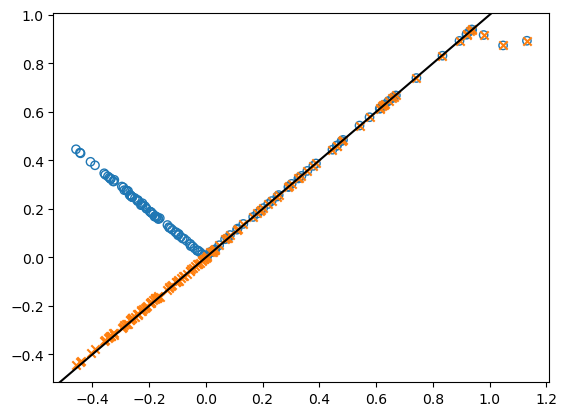

In [37]:
plt.scatter(df.gmst, df.gmst_abs, marker = "o", facecolor = "none", edgecolor = "tab:blue")
plt.scatter(df.gmst, df.gmst_2023, marker = "x", color = "tab:orange")
plt.axline((0,0), slope = 1, color = "k")

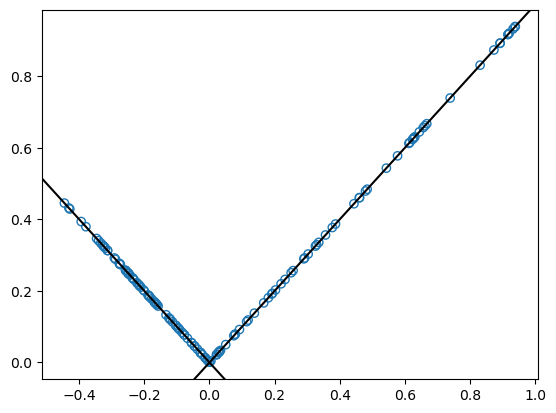

In [42]:
gmst_abs = pd.read_csv("../ts/EA-drought_gmst-smoothed.dat", comment = "#", sep = " +", engine = "python", header = None, names = ["year","gmst_abs"], index_col = "year")
gmst_fixed = pd.read_csv("EA-drought_gmst-corrected.dat", comment = "#", sep = " +", engine = "python", header = None, names = ["year","gmst_fixed"], index_col = "year")

df = pd.merge(gmst_fixed, gmst_abs, left_index = True, right_index = True)

plt.scatter(df.gmst_fixed, df.gmst_abs, marker = "o", facecolor = "none", edgecolor = "tab:blue")
plt.axline((0,0), slope = 1, color = "k")
plt.axline((0,0), slope = -1, color = "k")